## **Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

## **Import Dataset**

In [3]:
# dataset import
df = pd.read_csv('/content/drive/MyDrive/research/data_set_with_age.csv')
df.shape

(339, 4)

In [4]:
df.head()

,id,text,class,age
0,1,Feeling HopelessI'm in my first year of univer...,non-suicide,19
1,2,I can't take this anymore...I just wanna dieI'...,suicide,23
2,3,"I will die anyways, so what is wrong with I ac...",suicide,27
3,4,Damn. I wish i took the time to get to know h...,non-suicide,22
4,5,"It sounds stupid, but before I go to bed, I te...",suicide,21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      339 non-null    int64 
 1   text    339 non-null    object
 2   class   339 non-null    object
 3   age     339 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 10.7+ KB


## **Dataset Preprocess**

In [6]:
#find null values
df_no_null = df.dropna()
df_no_null

,id,text,class,age
0,1,Feeling HopelessI'm in my first year of univer...,non-suicide,19
1,2,I can't take this anymore...I just wanna dieI'...,suicide,23
2,3,"I will die anyways, so what is wrong with I ac...",suicide,27
3,4,Damn. I wish i took the time to get to know h...,non-suicide,22
4,5,"It sounds stupid, but before I go to bed, I te...",suicide,21
...,...,...,...,...
334,335,Gratitude is a powerful practice. Let's take t...,non-suicide,32
335,336,I appreciate your authenticity. Let's create a...,non-suicide,24
336,337,Your perspective is valuable. Let's listen wit...,non-suicide,27
337,338,Feeling inspired by your courage and strength....,non-suicide,29


In [7]:
df['class'].value_counts()

non-suicide    185
suicide        154
Name: class, dtype: int64

In [8]:
#find duplicates
df1 = df[df.duplicated()]
df1

,id,text,class,age


## **Quick EDA**

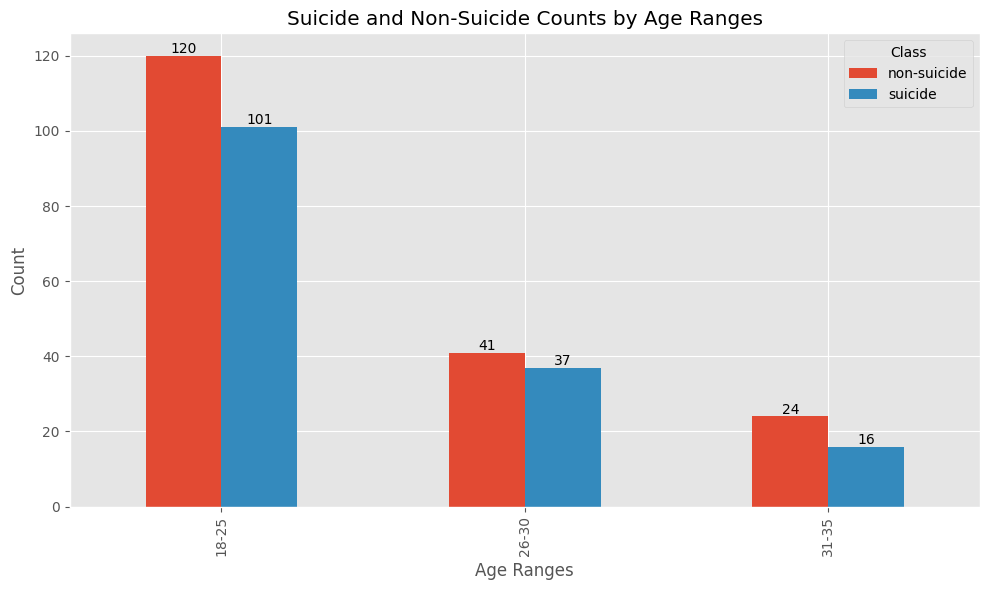

In [9]:
age_ranges = {
    '18-25': range(18, 26),
    '26-30': range(26, 31),
    '31-35': range(31, 36)
}

# Categorize ages into the defined age ranges
for range_name, age_range in age_ranges.items():
    df[range_name] = df['age'].apply(lambda x: range_name if x in age_range else None)

# Reshape the DataFrame to count occurrences of each 'class' within each age range
age_class_counts = df.melt(id_vars=['class'], value_vars=list(age_ranges.keys()),
                           value_name='Age Range').groupby(['Age Range', 'class']).size().unstack(fill_value=0)

# Plotting
ax = age_class_counts.plot(kind='bar', figsize=(10, 6))
ax.set_xlabel('Age Ranges')
ax.set_ylabel('Count')
ax.set_title('Suicide and Non-Suicide Counts by Age Ranges')
ax.legend(title='Class')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


In [10]:
df2 = pd.read_csv('/content/drive/MyDrive/research/data_set_with_levels.csv')
df2

,id,text,class,age,level
0,1,Feeling HopelessI'm in my first year of univer...,non-suicide,19,level2
1,2,I can't take this anymore...I just wanna dieI'...,suicide,23,level2
2,3,"I will die anyways, so what is wrong with I ac...",suicide,27,level1
3,4,Damn. I wish i took the time to get to know h...,non-suicide,22,level3
4,5,"It sounds stupid, but before I go to bed, I te...",suicide,21,level3
5,6,"I finally noticed this, as I am currently suic...",suicide,26,level2
6,7,Saved up enough money for my suicide.I don't h...,suicide,31,level1
7,8,21 year old university student. I don't think ...,suicide,21,level1
8,9,Dying soon I really can't do this anymore. My ...,suicide,24,level3
9,10,"Can't go anywhere, do anything, because even w...",non-suicide,27,level1


## **Use Transformers model for Sentiment Analysis**

In [11]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [12]:
sent_pipeline("I will die anyways, so what is wrong with I accelerating a bit the process?Tbh the only thing that is moving me on rn is some stuff that own and promised")

[{'label': 'NEGATIVE', 'score': 0.9994663596153259}]